<a href="https://colab.research.google.com/github/Sagor0078/AI/blob/main/howMatrices_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#How vector and matrices transform in space


**The introduction of numbers as coordinates is an act of violence." - Hermann Weyl**



Linear algebra is a surprisingly useful subject, at the heart of computer graphics, cryptography, and machine learning. It is applied in data compression, game theory, and understanding networks. Engineering applications of linear algebra are everywhere: electric circuits, statics and dynamics, digital signal processing, optimization, robotics, multi-body dynamics… you name it!

Let's get started! We will be using our favorite libraries of the Python ecosystem: NumPy and Matplotlib. We also have a few helper functions in the plot_helper.py script, which will make it easy to visualize the ideas in these lessons. Go ahead and load these by executing the next two cells.


In [ ]:
import numpy
%matplotlib inline
from matplotlib import pyplot
#
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp4plot'
urlretrieve(URL, 'plot_helper.py')

import sys
sys.path.append('../scripts/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
from plot_helper import *

#Vectors

**What is vectors?**

Vectors are everywhere: physics, engineering, mathematics, computer science, video games, and more. Each field's interpretation of what a vector is may be different, but vectors live a similar life in every space.


The first episode in the wonderful video series, **"Essence of Linear Algebra, by Grant Sanderson**" [link text] 
(https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&pp=iAQB
)tells you of three different ideas about vectors


    For physicists, a vector is an "arrow" of a given length (magnitude) and direction. It can represent directional quantities like velocity, force, acceleration.
    For computer scientists, a vector is an ordered list of numbers. It can represent a set of variables or features stored in order.
    For mathematicians, vectors are generic objects that behave a certain way when they are added or scaled: u+v,αv.



In physics, vectors are almost always two- or three-dimensional (although in some fancy branches of physics they do go to higher dimensions). Vectors help physicists describe things like motion and electro-magnetic fields on a plane or in physical 3D space.

In computer science and in data science, vectors are often multi-dimensional, that is, they have many components. They contain a set of ordered variables in a data model, like for example: the age, weight, daily hours of sleep, weekly hours of exercise, and blood pressure of an individual (five dimensions).





**Visualizing vectors**

Let's start with the idea of a vector as an "arrow" (magnitude plus direction). We visualize a vector by placing this arrow with its tail at the origin of a coordinate system. But changing the position of the tail doesn't change the vector's magnitude or direction, so the vector is the same no matter where we draw it.

In the code cell below, we define a list with a single vector of coordinates (2,2)
, and we use our custom function plot_vector() to plot the vector with its tail at four different positions on a 2D coordinate system.


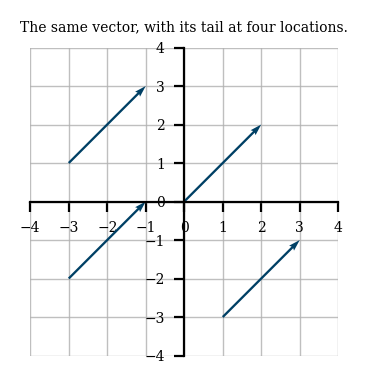

In [ ]:
vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)
pyplot.title("The same vector, with its tail at four locations.");


In the 2D plane, we can see clearly the connection between the "arrow" idea of vector, and the "list of numbers," which in this case represents the coordinates of the arrow head when the tail is at the origin of the coordinate system.

The first coordinate designates the horizontal distance between head and tail, and the second coordinate designates the vertical distance between head and tail. We typically will denote horizontal and vertical axes as x
and y

.

In three dimensions, x
and y are usually denoting the perpendicular axes on the horizontal plane, and the vertical axis is denoted by z. A 3D vector thus has three components: (x,y,z).

#Fundamental vector operations

Two operations are the foundation of everything: **vector addition, and multiplication by a scalar (i.e., scaling).**

Let's first visualize vector addition. Suppose we have two vectors:
a=[−2,1],b=[1,−3]

We can visualize vector addition as follows: draw vector a
with its tail at the origin; then draw vector b with its tail on the head of a. If you now draw a vector from the origin to the head of b, that vector is a+b

.

With our helper function for plotting 2D vectors, it looks like this:


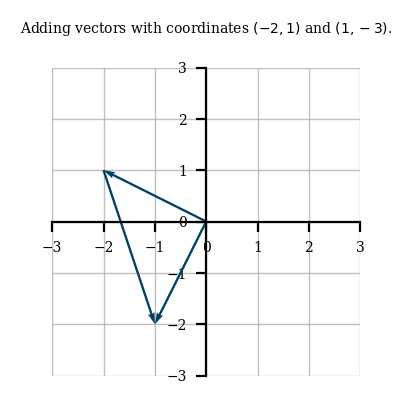

In [ ]:
 #vector addition
a = numpy.array((-2,1))
b = numpy.array((1,-3))
origin = numpy.array((0,0))

vectors = [a, b, a+b]
tails   = [origin, a, origin]
plot_vector(vectors, tails)
pyplot.title("Adding vectors with coordinates $(-2, 1)$ and $(1,-3)$.\n");

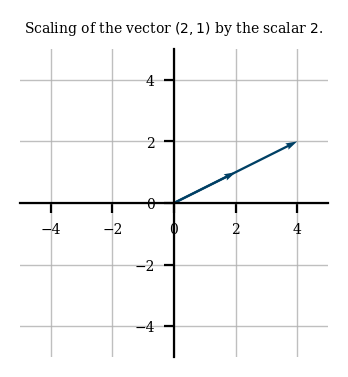

In [ ]:
# vector scaling
c = numpy.array((2,1))
vectors = [c, 2*c]
plot_vector(vectors)
pyplot.title("Scaling of the vector $(2,1)$ by the scalar $2$.");

**Basis vectors**

With the ideas of vector addition and multiplication by a scalar fresh in your mind, now imagine this. Any horizontal vector (i.e., having zero as its second component) can be scaled to have length 1

For example, the vector u=[u,0]
scaled by 1/u becomes [1,0]


Similarly, any vertical vector (having zero as its first component) can be scaled to have length 1

Going the opposite way,

    scaling the vector **i=[1,0]**

can give us all possible horizontal vectors, and
scaling the vector j=[0,1]

    can give us all possible vertical vectors.

Since every vector is the sum of a horizontal and a vertical one, it means we can generate all vectors by adding scaled versions of **i**
and **j**. That's why they are called **basis vetors**.


For any vector, its components are the scalars we need to multiply the basis vectors by to generate it. For example:
[3,2]=3⋅[1,0]+2⋅[0,1]=**3i+2j**

Let's visualize this using our helper function.

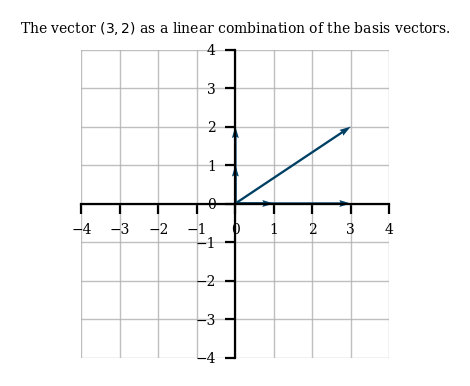

In [ ]:
# basis vector
i = numpy.array((1,0))
j = numpy.array((0,1))

vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)
pyplot.title("The vector $(3,2)$ as a linear combination of the basis vectors.");

**Linear combination and span** 

Adding two vectors that were each multiplied by a scalar is called a linear combination of those two vectors. Thus, we say that every vector is some linear combination of the basis vectors.

This brings us to the idea of the span of two vectors: the set of all possible linear combinations of the two. The second episode of the series **"Essence of Linear Algebra"** uses rich visuals to bring these ideas to life [2]. Recommended!

In the code cells below, we will use the NumPy function randint to get random integers in an interval (in this case, from 10 to 10). We then create a list of 30 random vectors on the plane via a linear combination of the basis vectors **i** and **j** , and we draw them all.


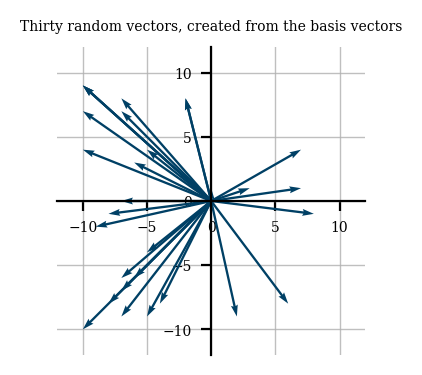

In [ ]:
from numpy.random import randint
# span
vectors = []
i = numpy.array((1,0))
j = numpy.array((0,1))

for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)
    
plot_vector(vectors)
pyplot.title("Thirty random vectors, created from the basis vectors");



**Matrices**

What's a matrix?

In many books, they'll tell you that a matrix is a "table" of numbers, ordered in rows and columns. Maybe that's enough for some people, but you will get a kick out of seeing what a matrix does!

Let's remember our friendly vectors from above:
a = $\begin{bmatrix} 
-2 & 1
\end{bmatrix}$
b = $\begin{bmatrix} 1 & 3\end{bmatrix}$

Our little experiment with 30 random linear combinations of and helped us visualize that they can span the 2D space, and nothing is stopping us from using them as a basis if we so desire.


**Matrices with NumPy**


Let's play around with this a bit more.

We can define a NumPy array to represent the matrix
,A as follows:

In [ ]:
A = [[-2,1], [1,-3]]
A = numpy.array(A)
print(A)


[[-2  1]
 [ 1 -3]]


In [ ]:
A.dot(c)

array([-3, -1])

In [ ]:
A.dot(i)
#A.dot(j)



array([-2,  1])

In [ ]:
A.dot(j)

array([ 1, -3])

 The matrix A when multiplied by the vector **i** gives the vector and when multiplied by the vector **j** gives the vector **b**.

Remember that we used the components of **c**
in a linear combination of **a** and **b** to get **c'**: 2**a**+1**b**. What we find is that the linear transformation represented by the matrix , transforms the vector to the linear combination of the transformed **i** and **j**.

Since all vectors are a linear combination of the basis vectors,**i** and **j** , scaled by the vector components, they are all transformed to a linear combination of **a** and **b** with the same scalars.

Let's try to visualize that. Our helpful custom function **plot_linear_transformation()** draws a grid of points on the plane, then applies the linear transformation described by the matrix argument, and plots the transformed grid. This is what **A** does to the grid:

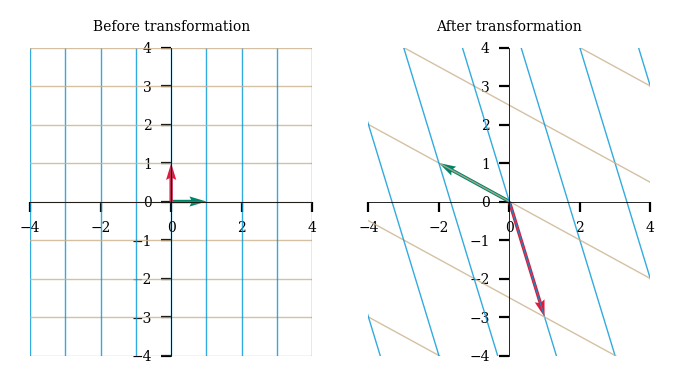

In [ ]:
plot_linear_transformation(A)


**Some special transformations**

Rotation,Shear,Scaling here : [link text](https://people.math.harvard.edu/~knill/teaching/math19b_2011/handouts/lecture08.pdf)

In [ ]:
rotation = numpy.array([[0,-1], [1,0]])
print(rotation)


[[ 0 -1]
 [ 1  0]]


In [ ]:
shear = numpy.array([[1,1], [0,1]])
print(shear)

[[1 1]
 [0 1]]


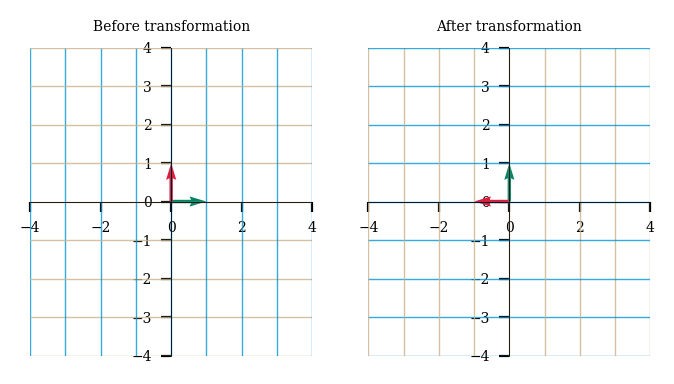

In [ ]:
plot_linear_transformation(rotation)

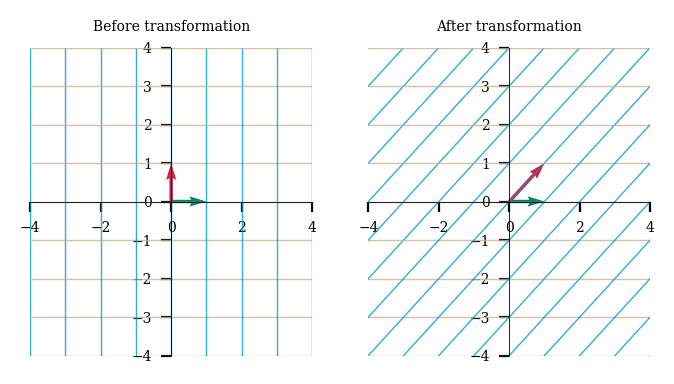

In [ ]:
plot_linear_transformation(shear)

[[2.  0. ]
 [0.  0.5]]


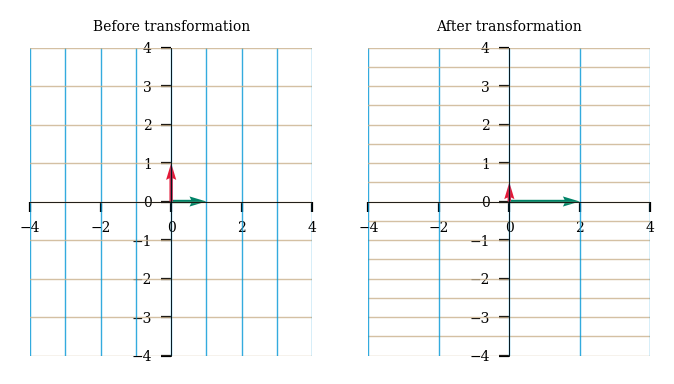

In [ ]:
scale = numpy.array([[2,0], [0,0.5]])
print(scale)
plot_linear_transformation(scale)

**Inverse of a matrix**

Thinking of matrices as linear transformations also helps demistify the idea of an inverse. 

NumPy has great built-in Linear Algebra capabilities in the numpy.linalg module. Among its many functions, we get inv(), to compute the inverse of a matrix. So we can try right away to visualize a sequence of transformations: first with the matrix M, then the inverse of M. Check it out.

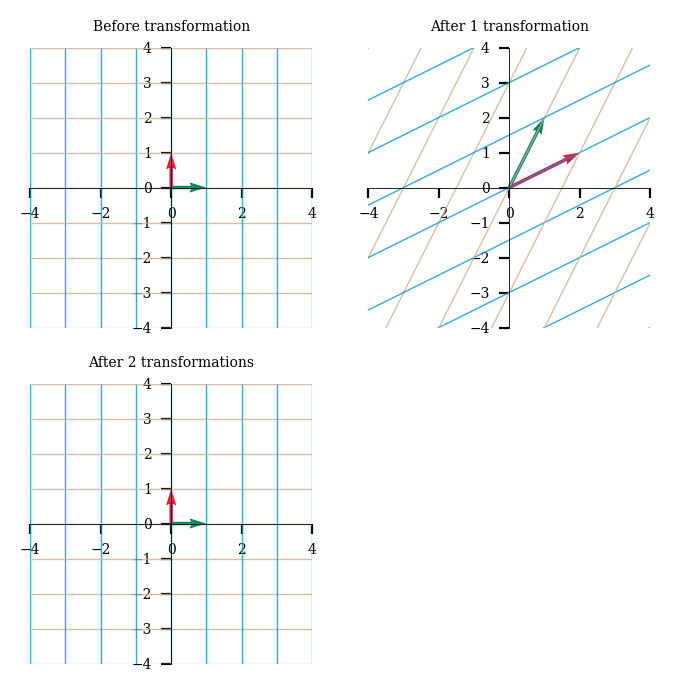

In [ ]:
from numpy.linalg import inv
M = numpy.array([[1,2], [2,1]])
M_inv = inv(M)
plot_linear_transformations(M, M_inv)

**"The Matrix is everywhere, it is all around us, even now in this very room." (Morpheus)**

**A matrix is a linear transformation**

In the first lesson of this module, we saw that a matrix corresponds to a linear transformation. For example, the matrix 
A = $\begin{bmatrix}
1 & 1 \\
-1 & 1 \\
\end{bmatrix}$

Let's use our helper function plot_linear_transformation() to visualize what this matrix does to the unit vectors and a grid on the 2D plane:

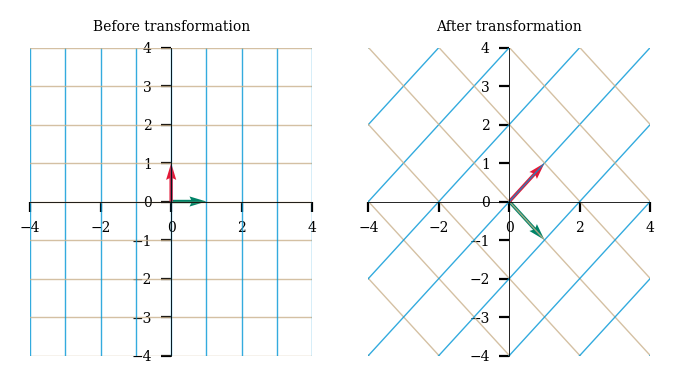

In [ ]:
A = numpy.array([[1,1], [-1,1]])
plot_linear_transformation(A)

## **Applications in Image Processing**

So where can we use this concept of matrix vector multiplication other than in thinking about abstract spaces ? One very important application of this concept can be see in image processing applications. We can consider an image to be a collection of vectors. Let’s consider grayscale images for simplicity, then a grayscale image basically is just a collection of vectors in 2-D space (location of grayscale pixels can be considered a 2-D vector). And we can multiply each pixel vector with a given matrix to transform the entire image!

Let’s import necessary libraries for image manipulation and downloading sample images from the web.

In [ ]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

import requests

url = 'https://images.pexels.com/photos/2850833/pexels-photo-2850833.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940'

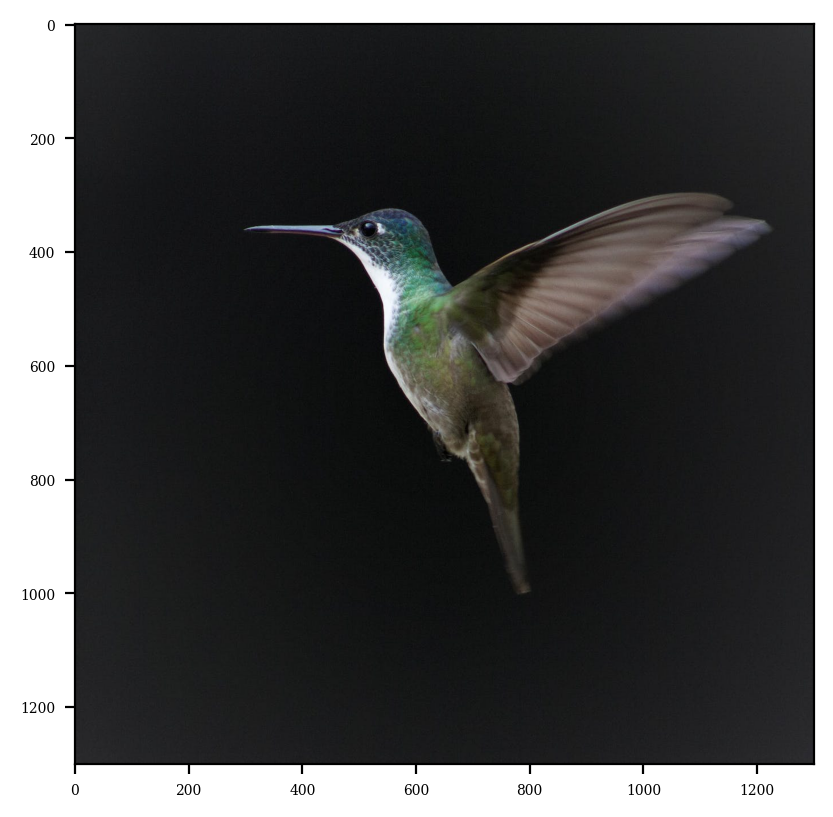

In [ ]:
im = Image.open(requests.get(url, stream=True).raw)
plt.imshow(im)


We will convert this image to grayscale format using the Pillow library.

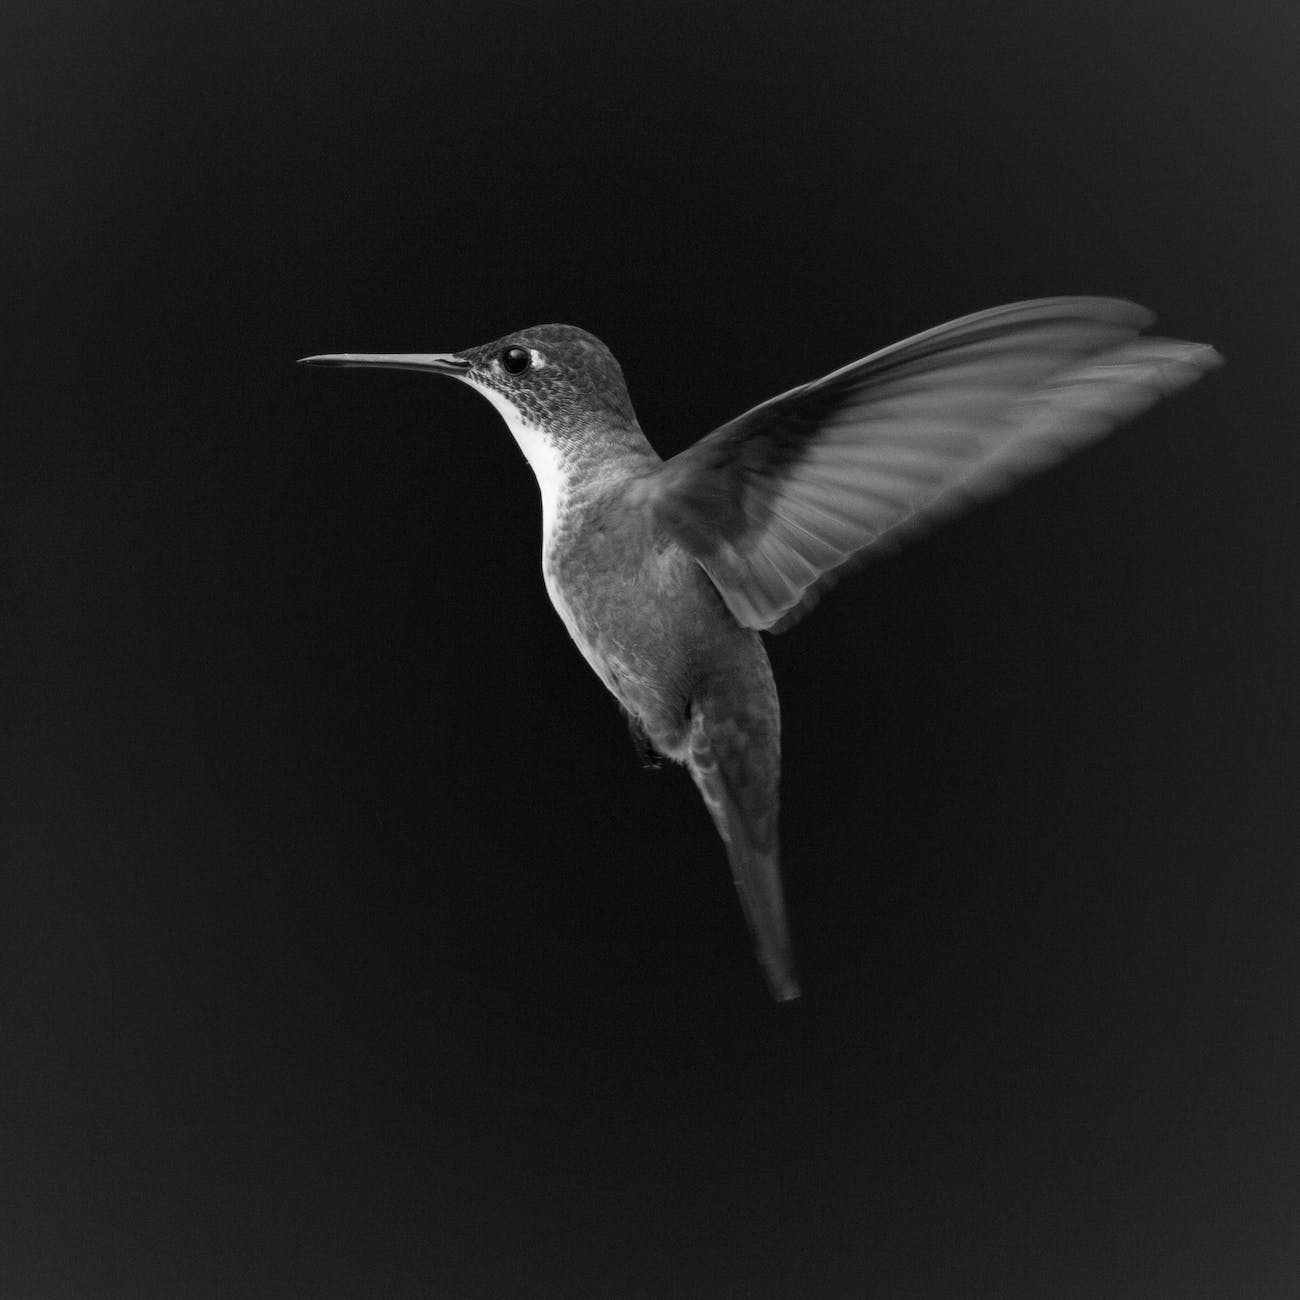

In [ ]:
im = im.convert('LA')
im


Let’s first check the dimensions of our image.

In [ ]:
b, h = im.size
b, h


(1300, 1300)

Now, we define a function that will multiply each pixel (2-D vector) of our image with a given matrix.

In [ ]:
def linear_transform(trans_mat, b_new = b, h_new = h):
    '''
    Effectively mulitplying each pixel vector by the transformation matrix
    PIL uses a tuple of 1st 2 rows of the inverse matrix
    '''
    Tinv = np.linalg.inv(trans_mat)
    Tinvtuple = (Tinv[0,0],Tinv[0,1], Tinv[0,2], Tinv[1,0],Tinv[1,1],Tinv[1,2])
    return im.transform((int(b_new), int(h_new)), Image.AFFINE, Tinvtuple, resample=Image.BILINEAR) 

Now let’s try scaling our image, 0.25x for X-axis and 0.5x for Y-axis. So our transformation matrix should look like ([0.25, 0], [0, 0.5]). However the Pillow library uses 3x3 matrices rather than a 2x2 matrix. So we can just add the third basis vector to our image without any transformation on it, ie, k_hat.

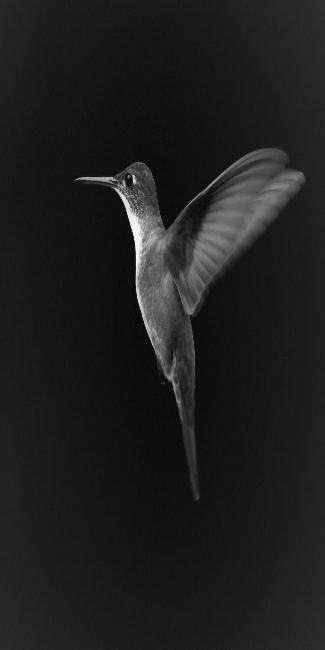

In [ ]:
T = np.matrix([[1/4, 0, 0],
               [0, 1/2, 0],
               [0, 0, 1]])

trans = linear_transform(T, b/4, h/2)
trans


We can rotate our image by 45 degrees counter clockwise using the below matrix.

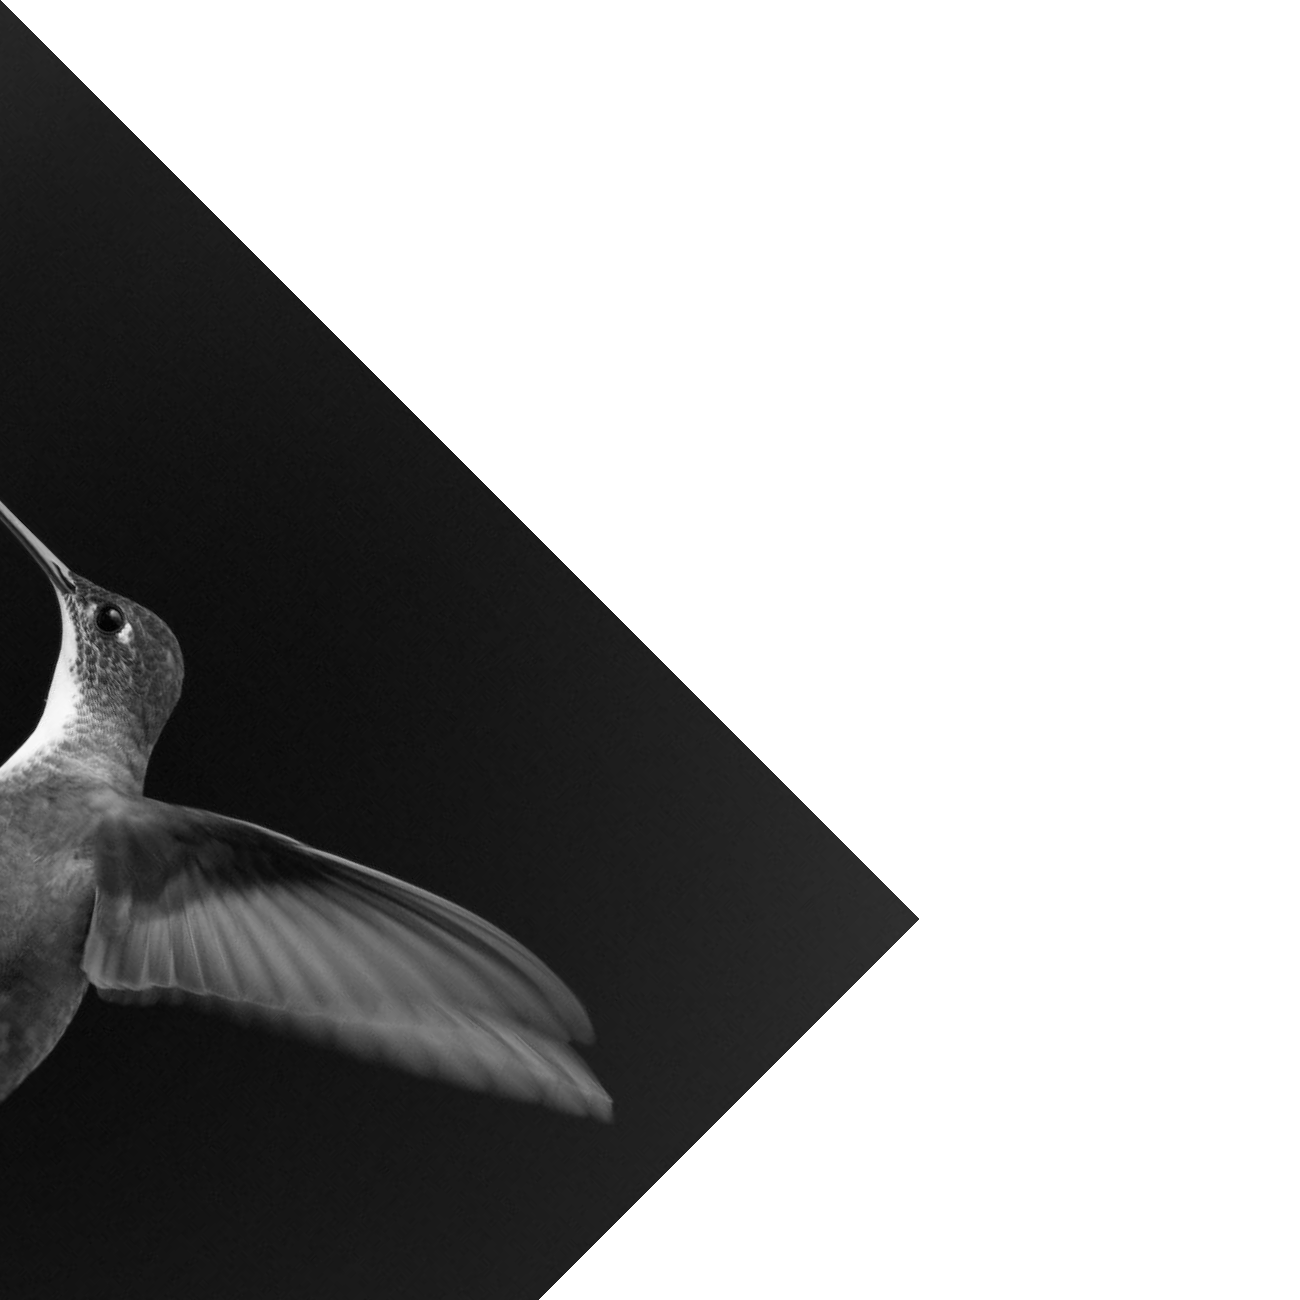

In [ ]:
mat_rotate = (1/ np.sqrt(2)) * \
    np.matrix([[1, -1, 0],
               [1, 1, 0],
               [0, 0, np.sqrt(2)]])

trans = linear_transform(mat_rotate)
trans


i found this blog on kaggle,here : [link text](https://www.kaggle.com/code/priteshshrivastava/linear-transformations-of-images-with-matrices/notebook
)

Reflection in xy-plane 

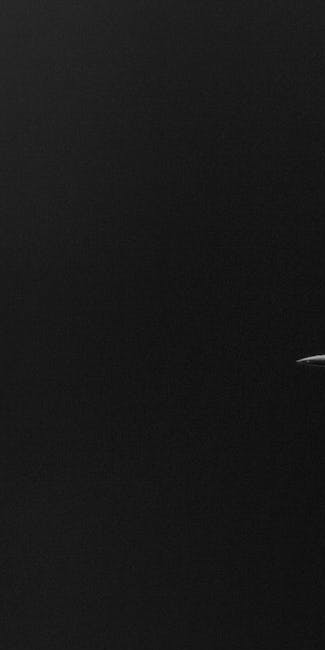

In [ ]:
T = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,-1,0],
               [0,0,0,1]])

trans = linear_transform(T, b/4, h/2)
trans